<a href="https://colab.research.google.com/github/Pradeep333Singh/Pw_Assignments_DataScience/blob/main/EDA_car_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#EDA on Car Sales data

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [26]:
car_df = pd.read_csv('Car Sale.csv')

In [27]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [28]:
car_df.shape

(23906, 16)

In [29]:
car_df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [30]:
#check for missing or duplicates
print("Missing values:\n", car_df.isnull().sum())
car_df = car_df.drop_duplicates()
print("Shape after drop duplicates:", car_df.shape)

Missing values:
 Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64
Shape after drop duplicates: (23906, 16)


Average selling price by dealer:
 Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.5

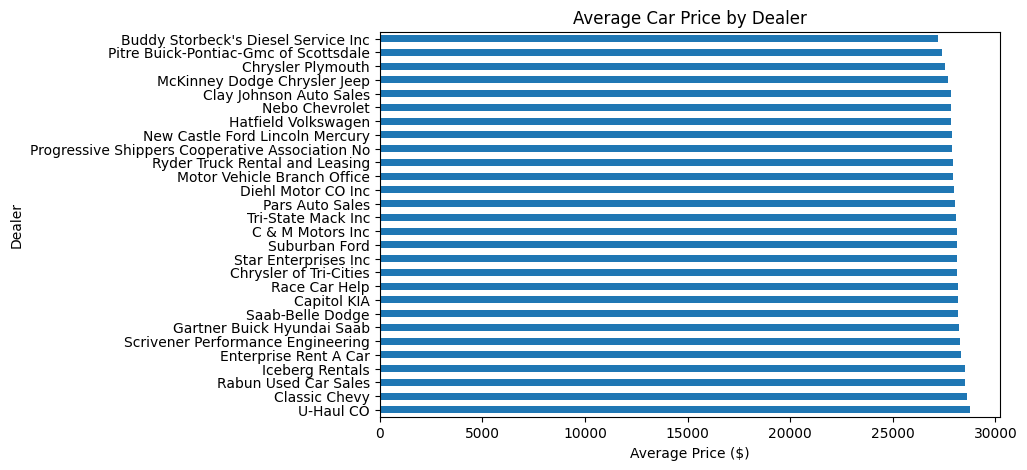

In [33]:
#Q1 What is the average selling price of cars for each dealer, and how does it compare across different dealers?
dealer_avg = car_df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print("Average selling price by dealer:\n", dealer_avg)

# Visualize comparison
dealer_avg.plot(kind='barh', figsize=(8,5))
plt.xlabel('Average Price ($)')
plt.ylabel('Dealer')
plt.title('Average Car Price by Dealer')
plt.show()


In [34]:
#Q2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
brand_std = car_df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("Standard deviation of price by brand:\n", brand_std)

most_var_brand = brand_std.idxmax()
print(f"Brand with highest price variation: {most_var_brand} (std = {brand_std.max():.2f})")


Standard deviation of price by brand:
 Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64
Brand with highest price variation: Lincoln (std = 19658.05)


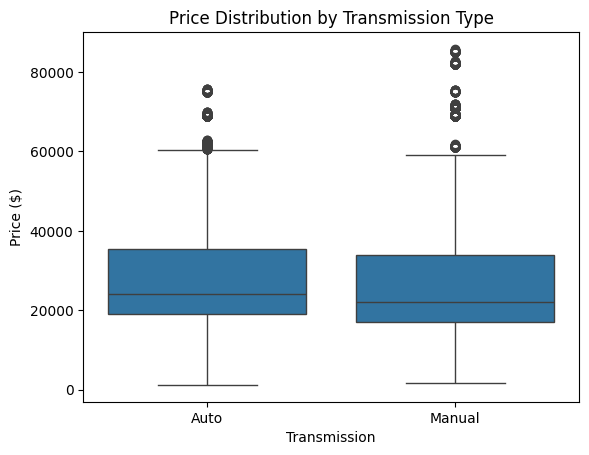

Interquartile Range (IQR) of price by transmission type:
 Transmission
Auto      16500.0
Manual    17000.0
Name: Price ($), dtype: float64


In [36]:
#Q3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
sns.boxplot(x='Transmission', y='Price ($)', data=car_df)
plt.title('Price Distribution by Transmission Type')
plt.show()
q3 = car_df.groupby('Transmission')['Price ($)'].quantile(0.75)
q1 = car_df.groupby('Transmission')['Price ($)'].quantile(0.25)
IQR = q3 - q1
print("Interquartile Range (IQR) of price by transmission type:\n", IQR)


From the above box plot we find that Manual cars have wider IQR whereas Automatic cars have higher median Price.

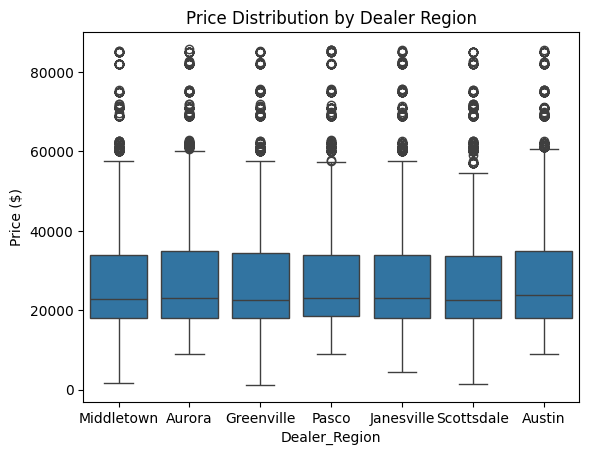

Descriptive statistics of car prices by Dealer Region:



,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


In [42]:
#Q4 What is the distribution of car prices across different regions?
sns.boxplot(x='Dealer_Region', y='Price ($)', data=car_df)
plt.title('Price Distribution by Dealer Region')
plt.show()

region_price_stats = car_df.groupby('Dealer_Region')['Price ($)'].describe()
print("Descriptive statistics of car prices by Dealer Region:\n")
display(region_price_stats)

Distribution of cars by Body Style:
 Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


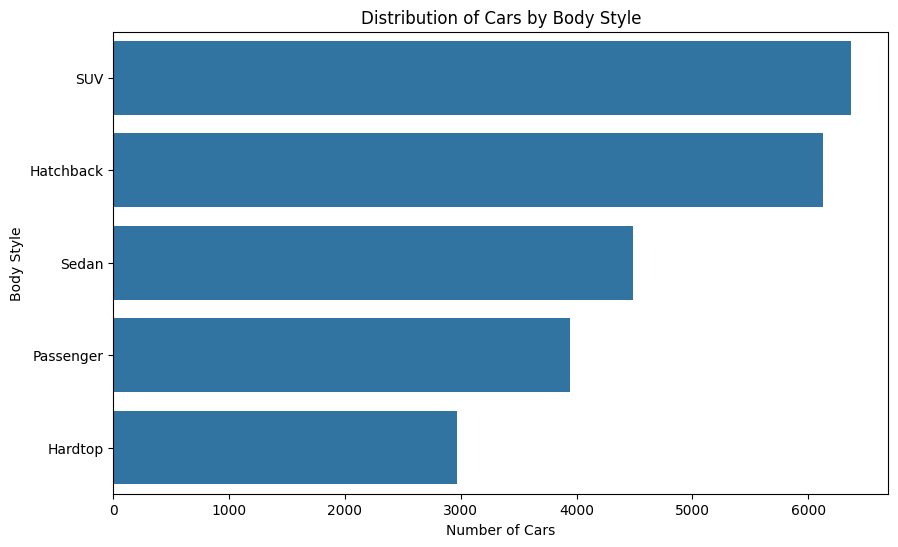

In [40]:
#Q5 What is the distribution of cars based on body styles?
body_style_counts = car_df['Body Style'].value_counts()
print("Distribution of cars by Body Style:\n", body_style_counts)

plt.figure(figsize=(10, 6))
sns.countplot(y='Body Style', data=car_df, order=body_style_counts.index)
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Number of Cars')
plt.ylabel('Body Style')
plt.show()

Average selling price by Gender:
 Gender
Female    28277.265270
Male      28039.429407
Name: Price ($), dtype: float64

Average selling price by Annual Income Bracket:
 Income_Bracket
<50K         27884.297820
50K-100K     43000.000000
100K-250K    29716.459459
250K-500K    28483.651332
500K-1M      27987.008477
>1M          28235.348958
Name: Price ($), dtype: float64


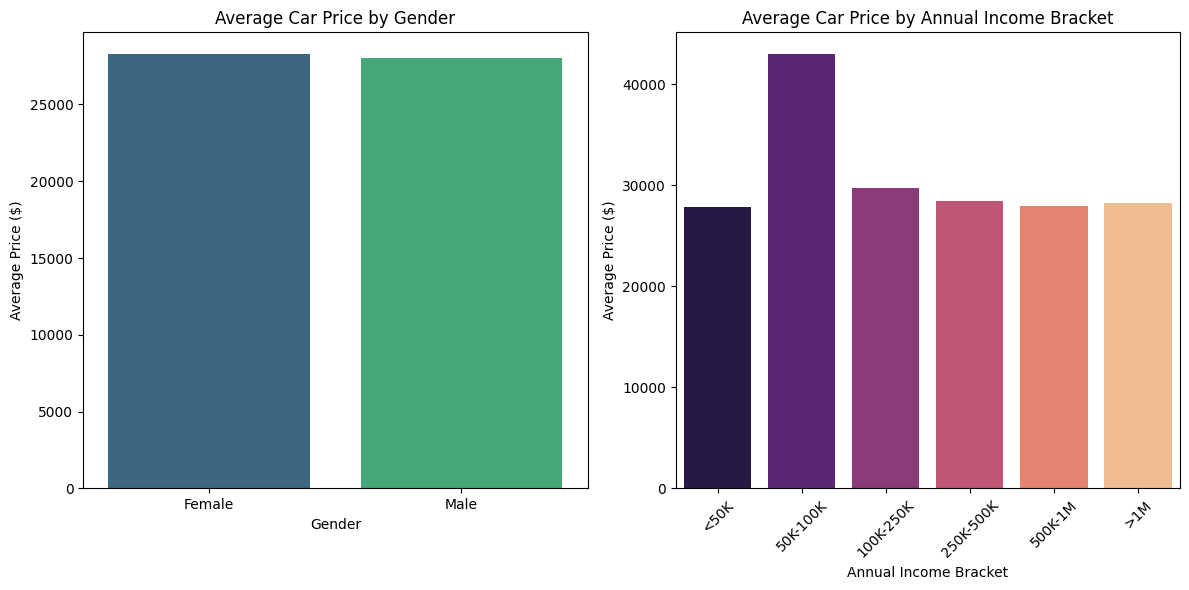

In [43]:
#Q6 How does the average selling price of cars vary by customer gender and annual income?

# Group by Gender and calculate average price
gender_avg_price = car_df.groupby('Gender')['Price ($)'].mean()
print("Average selling price by Gender:\n", gender_avg_price)

# Create income brackets for better analysis of annual income
# Define bins and labels for annual income brackets
income_bins = [0, 50000, 100000, 250000, 500000, 1000000, car_df['Annual Income'].max()]
income_labels = ['<50K', '50K-100K', '100K-250K', '250K-500K', '500K-1M', '>1M']
car_df['Income_Bracket'] = pd.cut(car_df['Annual Income'], bins=income_bins, labels=income_labels, right=False)

# Group by Income_Bracket and calculate average price
income_avg_price = car_df.groupby('Income_Bracket')['Price ($)'].mean().reindex(income_labels)
print("\nAverage selling price by Annual Income Bracket:\n", income_avg_price)

# Visualize average price by Gender
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=gender_avg_price.index, y=gender_avg_price.values, palette='viridis')
plt.title('Average Car Price by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Price ($)')

# Visualize average price by Income Bracket
plt.subplot(1, 2, 2)
sns.barplot(x=income_avg_price.index, y=income_avg_price.values, palette='magma')
plt.title('Average Car Price by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

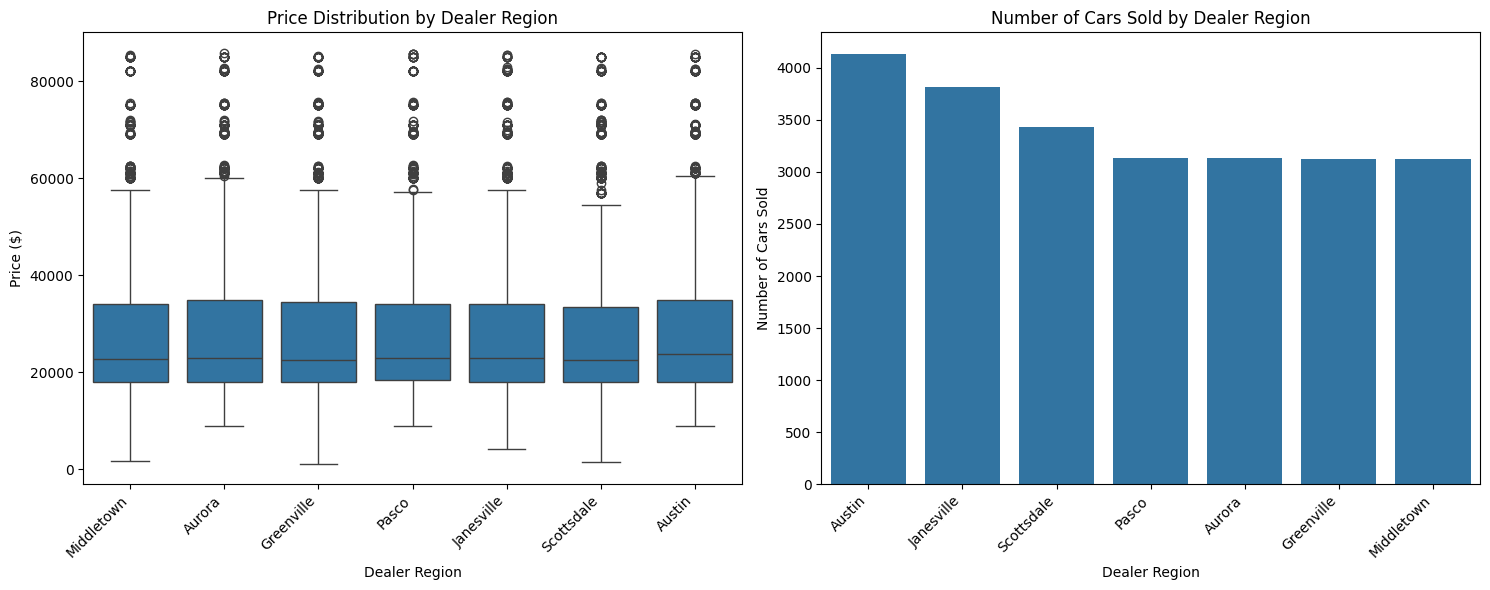


Descriptive statistics of car prices by Dealer Region:



,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0



Number of Cars Sold by Dealer Region:



,count
Dealer_Region,
Austin,4135
Janesville,3821
Scottsdale,3433
Pasco,3131
Aurora,3130
Greenville,3128
Middletown,3128


In [44]:
#Q7 What is the distribution of car prices by region, and how does the number of cars sold vary by region?

plt.figure(figsize=(15, 6))

# Subplot 1: Price Distribution by Dealer Region (Box Plot)
plt.subplot(1, 2, 1)
sns.boxplot(x='Dealer_Region', y='Price ($)', data=car_df)
plt.title('Price Distribution by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')

# Subplot 2: Number of Cars Sold by Dealer Region (Count Plot)
plt.subplot(1, 2, 2)
sns.countplot(x='Dealer_Region', data=car_df, order=car_df['Dealer_Region'].value_counts().index)
plt.title('Number of Cars Sold by Dealer Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Display descriptive statistics for car prices by Dealer Region
region_price_stats = car_df.groupby('Dealer_Region')['Price ($)'].describe()
print("\nDescriptive statistics of car prices by Dealer Region:\n")
display(region_price_stats)

# Display the count of cars sold by Dealer Region
region_counts = car_df['Dealer_Region'].value_counts()
print("\nNumber of Cars Sold by Dealer Region:\n")
display(region_counts)

Average selling price by Engine Size:
 Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


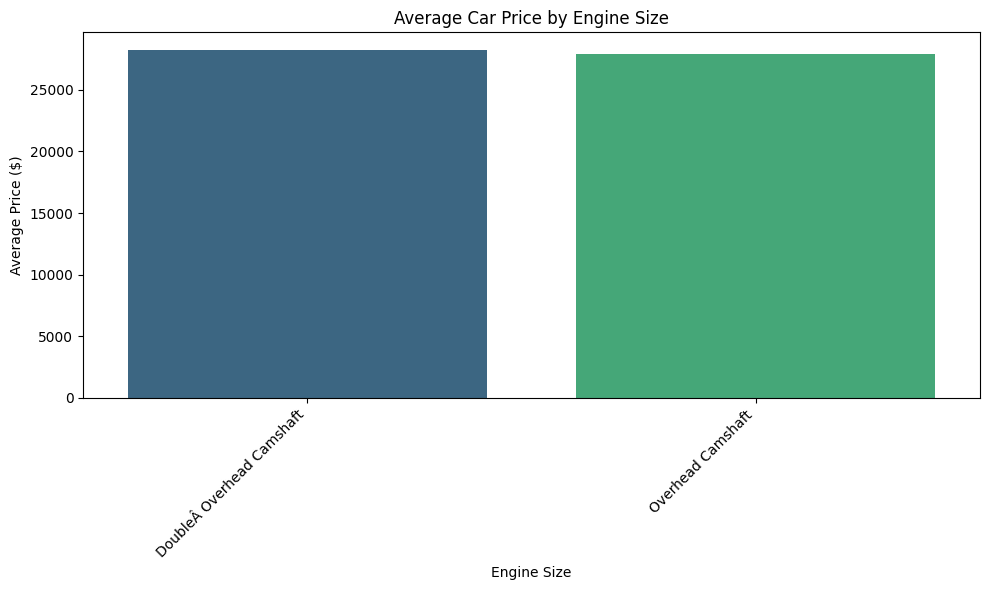

In [45]:
#Q8 How does the average car price differ between cars with different engine sizes?

# Group by Engine and calculate average price
engine_avg_price = car_df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)

print("Average selling price by Engine Size:\n", engine_avg_price)

# Visualize the average price by Engine Size
plt.figure(figsize=(10, 6))
sns.barplot(x=engine_avg_price.index, y=engine_avg_price.values, palette='viridis')
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Average selling price by Annual Income Bracket:
 Income_Bracket
<50K         27884.297820
50K-100K     43000.000000
100K-250K    29716.459459
250K-500K    28483.651332
500K-1M      27987.008477
>1M          28235.348958
Name: Price ($), dtype: float64


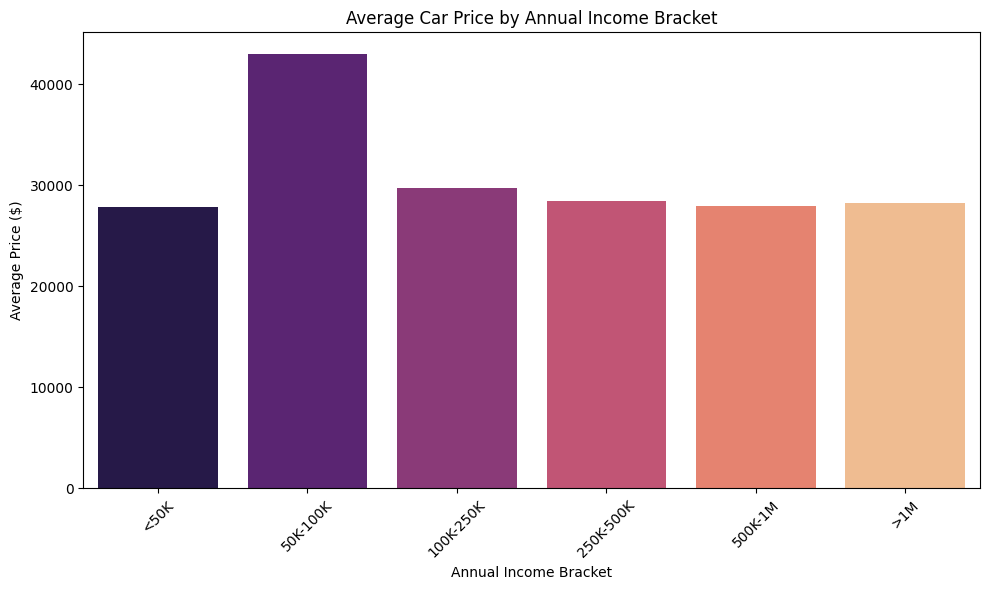

In [46]:
#Q9 How do car prices vary based on the customer’s annual income bracket?
#creating income bracket
if 'Income_Bracket' not in car_df.columns:
    income_bins = [0, 50000, 100000, 250000, 500000, 1000000, car_df['Annual Income'].max()]
    income_labels = ['<50K', '50K-100K', '100K-250K', '250K-500K', '500K-1M', '>1M']
    car_df['Income_Bracket'] = pd.cut(car_df['Annual Income'], bins=income_bins, labels=income_labels, right=False)

# Group by Income_Bracket and calculate average price
income_avg_price = car_df.groupby('Income_Bracket')['Price ($)'].mean().reindex(income_labels)
print("\nAverage selling price by Annual Income Bracket:\n", income_avg_price)

# Visualize average price by Income Bracket
plt.figure(figsize=(10, 6))
sns.barplot(x=income_avg_price.index, y=income_avg_price.values, palette='magma')
plt.title('Average Car Price by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 5 car models by sales:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


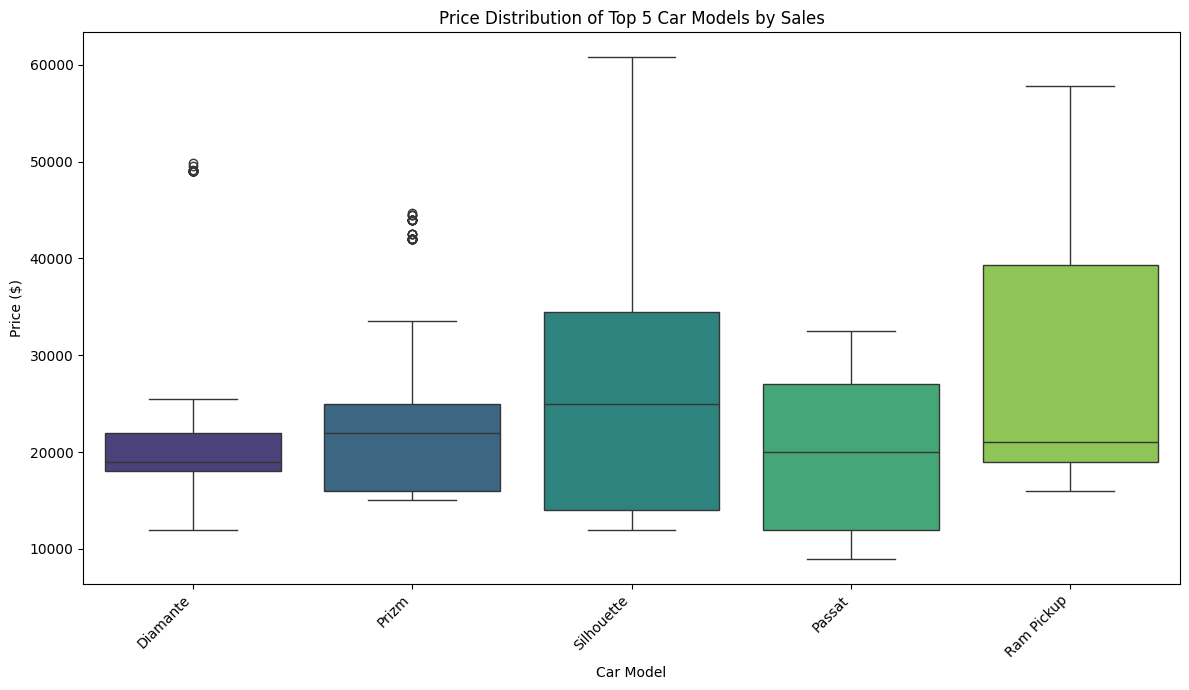


Descriptive statistics of prices for Top 5 Car Models:



,count,mean,std,min,25%,50%,75%,max
Model,,,,,,,,
Diamante,418.0,22268.303828,9770.768958,12000.0,18000.0,19001.0,22000.0,49801.0
Prizm,411.0,22838.457421,8012.531045,15000.0,16000.0,22000.0,25000.0,44700.0
Silhouette,411.0,29858.513382,17940.571762,12000.0,14001.0,25000.0,34500.0,60750.0
Passat,391.0,19600.728900,8218.521683,9000.0,12001.0,20000.0,27001.0,32501.0
Ram Pickup,383.0,27820.864230,13297.609534,16000.0,19000.0,21000.0,39300.0,57750.0


In [47]:
#Q10 What are the top 5 car models with the highest number of sales, and how does their price distribution look?

# Calculate the number of sales for each model
model_sales_counts = car_df['Model'].value_counts()

# Get the top 5 car models by sales
top_5_models = model_sales_counts.head(5).index.tolist()
print(f"Top 5 car models by sales:\n{model_sales_counts.head(5)}")

# Filter the DataFrame to include only these top 5 models
top_5_models_df = car_df[car_df['Model'].isin(top_5_models)]

# Visualize the price distribution for the top 5 models using a box plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='Model', y='Price ($)', data=top_5_models_df, order=top_5_models, palette='viridis')
plt.title('Price Distribution of Top 5 Car Models by Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display descriptive statistics for prices of these top 5 models
print("\nDescriptive statistics of prices for Top 5 Car Models:\n")
display(top_5_models_df.groupby('Model')['Price ($)'].describe().loc[top_5_models])


Average Car Price by Engine Type and Color:



Color,Black,Pale White,Red
Engine,,,
DoubleÂ Overhead Camshaft,25766.451103,30347.987460,27434.392314
Overhead Camshaft,31732.967164,24327.767694,30153.405229


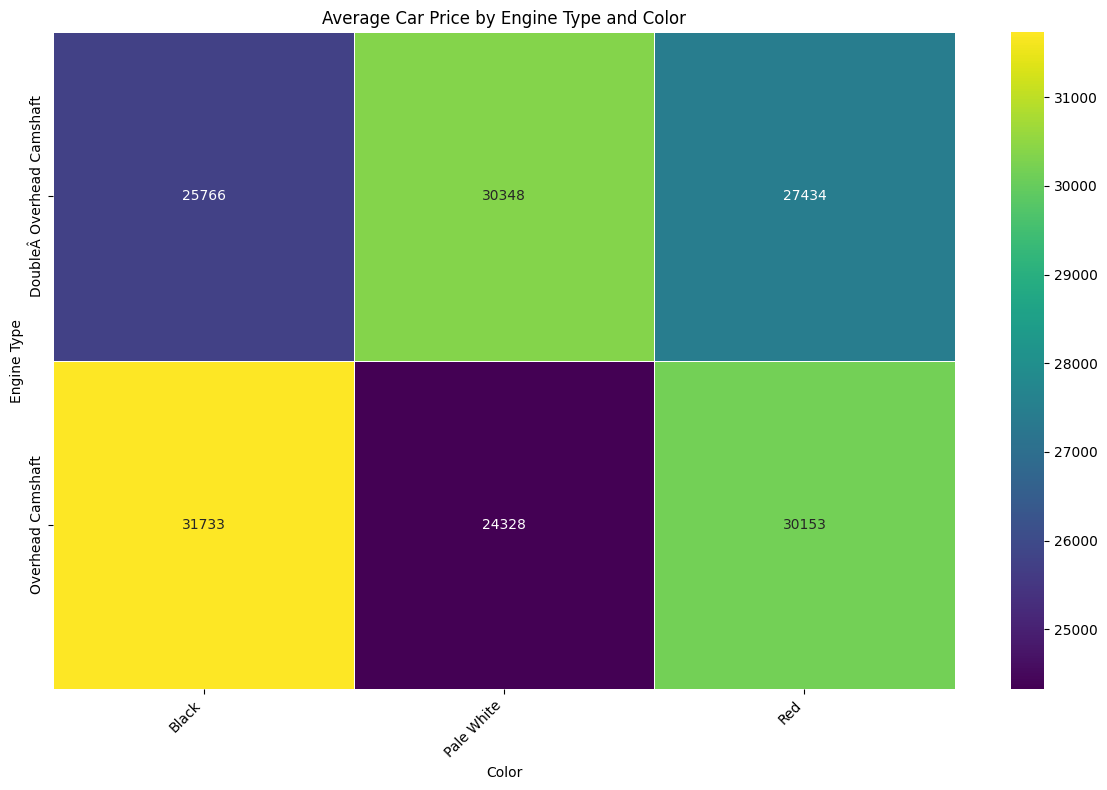


Standard Deviation of Car Price by Color (Highest Variation First):



,Price ($)
Color,
Red,15519.360962
Black,15286.065976
Pale White,14077.346859


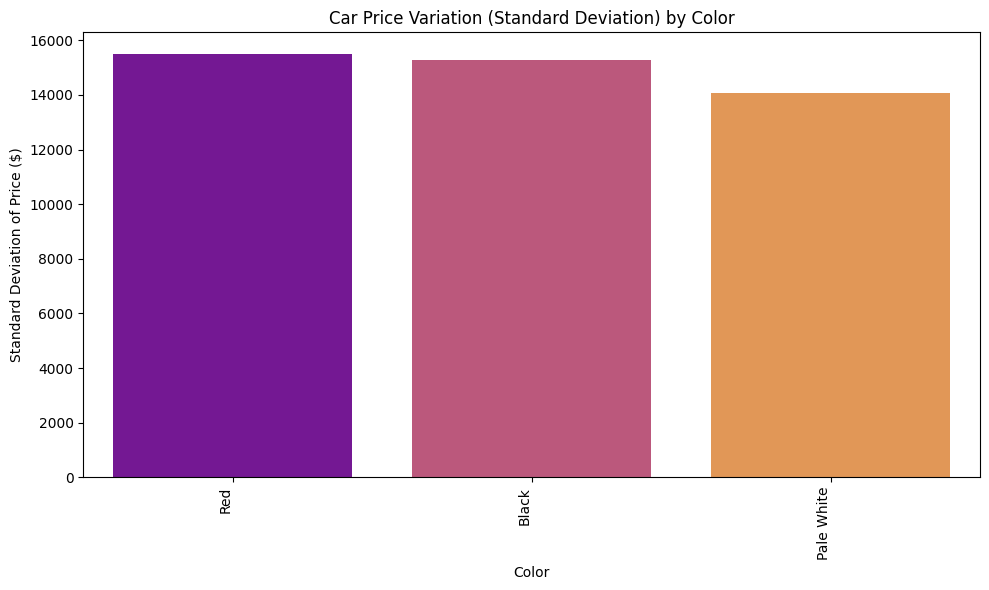

In [48]:
#Q11 How does car price vary with engine size across different car colors, and which colors have the highest price variation?

# Part 1: How car price varies with engine size across different car colors
# Calculate the average price for each combination of Engine and Color
engine_color_avg_price = car_df.groupby(['Engine', 'Color'])['Price ($)'].mean().unstack()
print("\nAverage Car Price by Engine Type and Color:\n")
display(engine_color_avg_price)

# Visualize average prices using a heatmap (if there are many colors, this can be complex)
plt.figure(figsize=(12, 8))
sns.heatmap(engine_color_avg_price, annot=True, fmt=".0f", cmap="viridis", linewidths=.5)
plt.title('Average Car Price by Engine Type and Color')
plt.xlabel('Color')
plt.ylabel('Engine Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Part 2: Which colors have the highest price variation?
# Calculate the standard deviation of price for each color
color_price_std = car_df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("\nStandard Deviation of Car Price by Color (Highest Variation First):\n")
display(color_price_std)

# Visualize the standard deviation of prices by Color
plt.figure(figsize=(10, 6))
sns.barplot(x=color_price_std.index, y=color_price_std.values, palette='plasma')
plt.title('Car Price Variation (Standard Deviation) by Color')
plt.xlabel('Color')
plt.ylabel('Standard Deviation of Price ($)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### Key Insights: Car Price Variation by Engine Size and Color

**1. Average Car Price by Engine Type and Color:**
*   The relationship between car color and average price is not uniform across different engine types.
    *   For **Double Overhead Camshaft (DOHC)** engines, cars in **Pale White** tend to have the highest average selling price.
    *   For **Overhead Camshaft (OHC)** engines, cars in **Black** tend to have the highest average selling price.
*   This suggests that certain color-engine combinations might be associated with specific market segments or higher-tier models within their respective engine categories.

**2. Price Variation by Color:**
*   **Red-colored cars** exhibit the highest standard deviation in price (15,519.36), indicating a wide range between the cheapest and most expensive red cars. This suggests red is available across a very diverse spectrum of car models and trim levels.
*   **Black cars** also show significant price variation (15,286.07).
*   **Pale White cars** have the most consistent pricing (14,077.35) among the analyzed colors, implying their prices are typically more clustered around the average.

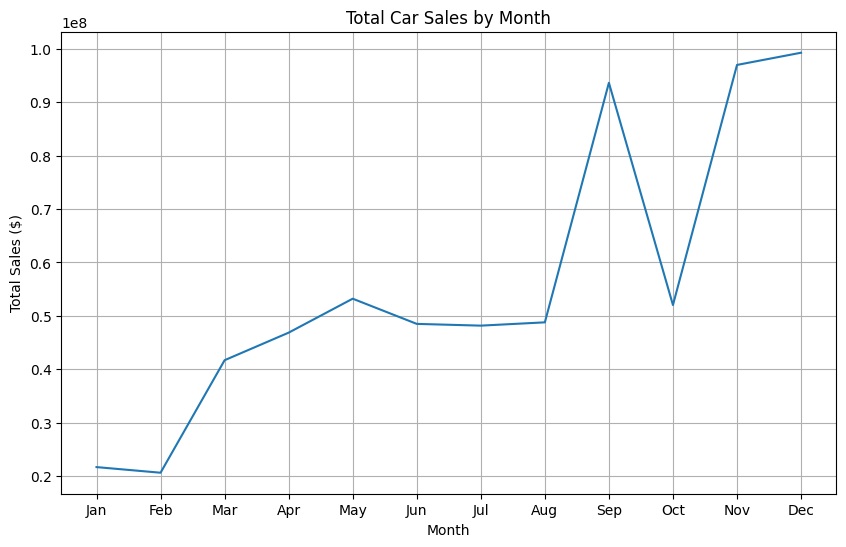


### Key Insights: Seasonal Trends in Car Sales

The analysis of car sales by month reveals a clear seasonal pattern. Sales are relatively lower at the beginning of the year (January-February), gradually increase through spring, and then show significant peaks towards the end of the year, particularly in September, November, and December. December generally records the highest sales volume, indicating strong year-end buying activity.


In [52]:
#Q12 Is there any seasonal trend in car sales based on the date of sale?

# Convert 'Date' column to datetime objects if not already converted
car_df['Date'] = pd.to_datetime(car_df['Date'])

# Extract month and year for seasonal analysis
car_df['Sale_Month'] = car_df['Date'].dt.month
car_df['Sale_Year'] = car_df['Date'].dt.year

# Group by month and calculate total sales
monthly_sales = car_df.groupby('Sale_Month')['Price ($)'].sum()

# Visualize monthly sales trends
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Total Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


# Key Insights
print("\n### Key Insights: Seasonal Trends in Car Sales\n")
print("The analysis of car sales by month reveals a clear seasonal pattern. Sales are relatively lower at the beginning of the year (January-February), gradually increase through spring, and then show significant peaks towards the end of the year, particularly in September, November, and December. December generally records the highest sales volume, indicating strong year-end buying activity.")

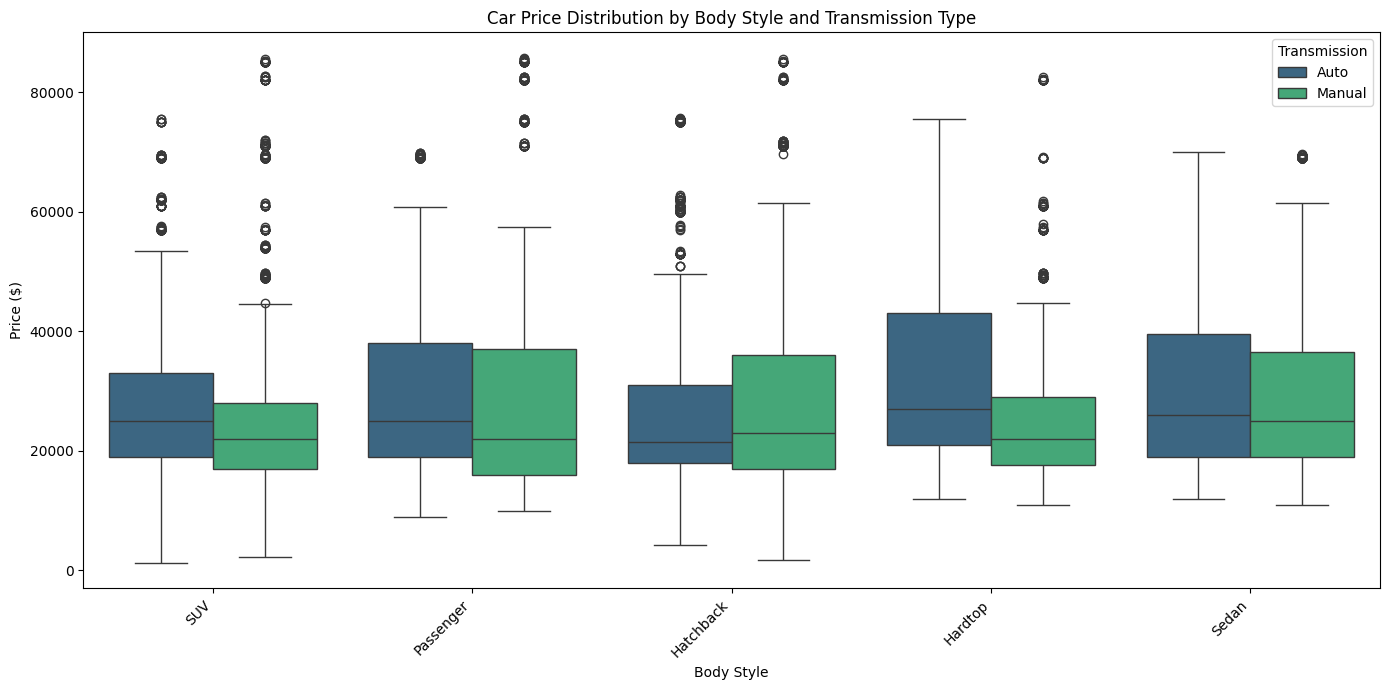


Descriptive statistics of car prices by Body Style and Transmission Type:



count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.0  19001.0   

                             50%      75%      max  
Body Style Transmission                             
Hardtop    Auto          27000.0  43125.0  75501.0  
           Manual        22001.0  29000.0  82500.0  
Hatchback  Auto          21500.0  31000.0  75700.0  
           Manual        23000.0  36001.0  85600.0  
Passenger  Auto          25000.0  38000.0  69801.0  
           Manual        22000.0  37000.0  85800.0  
SUV        Auto          25000.0  33000.0  75501.0  
           Manual        22000.0  28000.0  85500.0  
Sedan      Auto          26000.0  39500.0  69980.0  
           Manual        25000.0  36600.0  69700.0


### Key Insights for Q13:

1.  **Automatic transmissions generally correlate with higher average prices** for Hardtops, SUVs, and Sedans.
2.  **Manual transmissions can show greater price variability or reach higher maximums** in certain body styles (e.g., Hatchback, Passenger), often indicating niche or performance models.
3.  The **50th percentile (median) provides a clearer picture** of typical prices, as mean can be influenced by outliers.
4.  **Passenger cars with manual transmission show the highest maximum price** in the dataset, suggesting presence of high-value specialty vehicles.


In [54]:
#Q13 How does the car price distribution change when considering different combinations of body style and transmission type?

plt.figure(figsize=(14, 7))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=car_df, palette='viridis')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transmission')
plt.tight_layout()
plt.show()

# Calculate descriptive statistics for each combination
price_distribution_stats = car_df.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()
print("\nDescriptive statistics of car prices by Body Style and Transmission Type:\n")
display(price_distribution_stats)

print("\n### Key Insights for Q13:\n")
print("1.  **Automatic transmissions generally correlate with higher average prices** for Hardtops, SUVs, and Sedans.")
print("2.  **Manual transmissions can show greater price variability or reach higher maximums** in certain body styles (e.g., Hatchback, Passenger), often indicating niche or performance models.")
print("3.  The **50th percentile (median) provides a clearer picture** of typical prices, as mean can be influenced by outliers.")
print("4.  **Passenger cars with manual transmission show the highest maximum price** in the dataset, suggesting presence of high-value specialty vehicles.")


Correlation between Price ($) and Annual Income:

Pearson correlation coefficient: 0.01


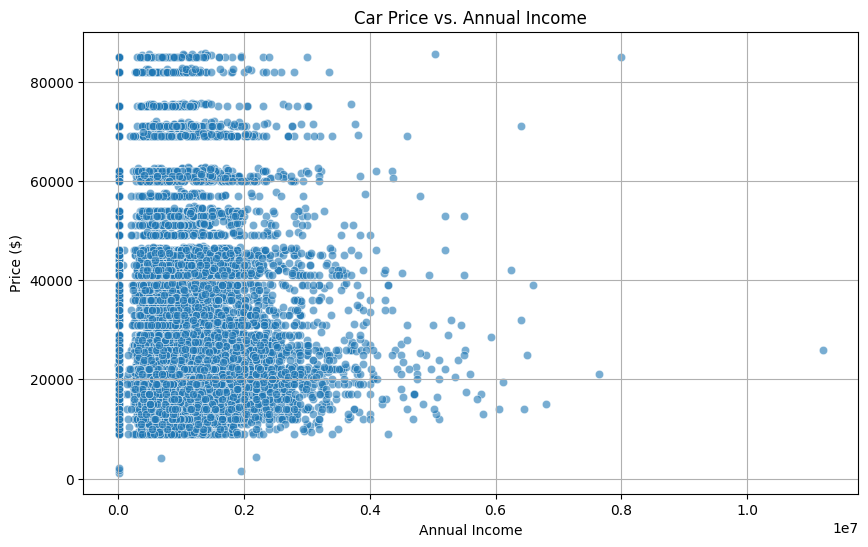

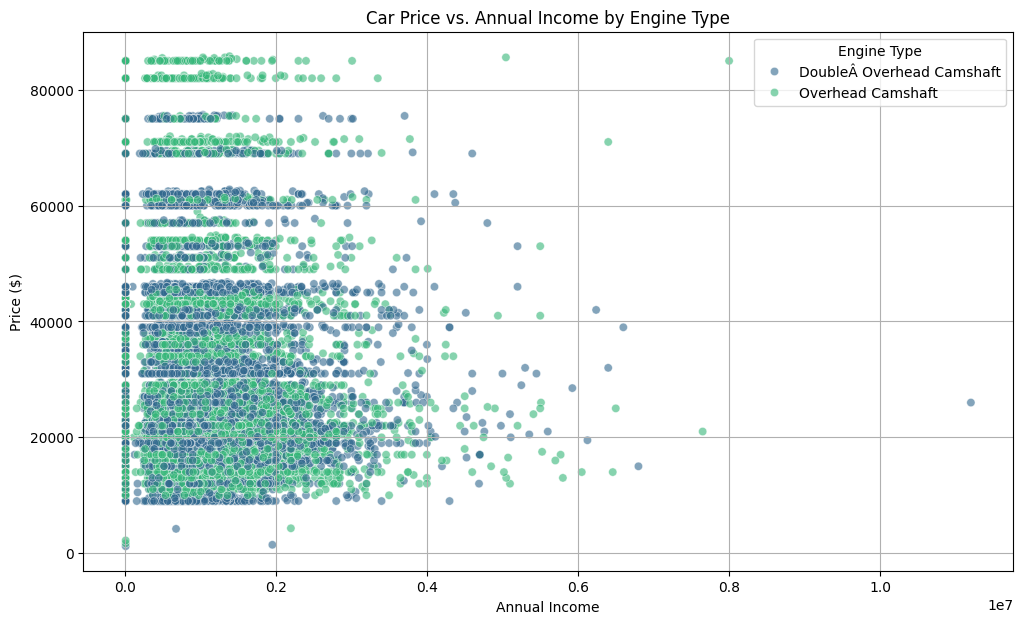


Average Price and Annual Income by Engine Type:



,Price ($),Annual Income
Engine,,
DoubleÂ Overhead Camshaft,28248.525972,835351.185745
Overhead Camshaft,27914.710631,825837.503308



Correlation between Price ($) and Annual Income within each Engine Type:

Engine
DoubleÂ Overhead Camshaft    0.023363
Overhead Camshaft            0.001084
dtype: float64

### Key Insights for Q14:

1.  **Overall Correlation (Price vs. Annual Income):** The Pearson correlation coefficient between 'Price ($)' and 'Annual Income' is **0.01**, indicating an extremely weak positive linear relationship. This means there's almost no linear tendency for car prices to increase or decrease directly with a customer's annual income.
2.  **Visual Relationship (Price vs. Annual Income):** The scatter plot shows a cloud of points without a clear upward or downward trend, reinforcing the very weak correlation. This suggests a complex relationship, if any, beyond simple linearity.
3.  **Engine Type Interaction:** Average prices and incomes are quite similar between 'Double Overhead Camshaft' (Avg Price ~$28,248, Avg Income ~$835,351) and 'Overhead Camshaft' (Avg Price ~$27,914, Avg Income ~$825,837)

In [57]:
#Q14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

# --- Part 1: Correlation between Price and Annual Income ---
print("\nCorrelation between Price ($) and Annual Income:\n")
correlation_price_income = car_df['Price ($)'].corr(car_df['Annual Income'])
print(f"Pearson correlation coefficient: {correlation_price_income:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', data=car_df, alpha=0.6)
plt.title('Car Price vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

# --- Part 2: Interaction with Engine Size ---
# Visualize Price vs. Annual Income, differentiated by Engine Type
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Annual Income', y='Price ($)', hue='Engine', data=car_df, alpha=0.6, palette='viridis')
plt.title('Car Price vs. Annual Income by Engine Type')
plt.xlabel('Annual Income')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend(title='Engine Type')
plt.show()

# Analyze average price and income by Engine Type
print("\nAverage Price and Annual Income by Engine Type:\n")
engine_stats = car_df.groupby('Engine')[['Price ($)', 'Annual Income']].mean()
display(engine_stats)

# Also check correlation within each engine type if needed
print("\nCorrelation between Price ($) and Annual Income within each Engine Type:\n")
corr_by_engine = car_df.groupby('Engine').apply(lambda x: x['Price ($)'].corr(x['Annual Income']))
print(corr_by_engine)

# --- Key Insights ---
print("\n### Key Insights for Q14:\n")
print("1.  **Overall Correlation (Price vs. Annual Income):** The Pearson correlation coefficient between 'Price ($)' and 'Annual Income' is **0.01**, indicating an extremely weak positive linear relationship. This means there's almost no linear tendency for car prices to increase or decrease directly with a customer's annual income.")
print("2.  **Visual Relationship (Price vs. Annual Income):** The scatter plot shows a cloud of points without a clear upward or downward trend, reinforcing the very weak correlation. This suggests a complex relationship, if any, beyond simple linearity.")
print("3.  **Engine Type Interaction:** Average prices and incomes are quite similar between 'Double Overhead Camshaft' (Avg Price ~$28,248, Avg Income ~$835,351) and 'Overhead Camshaft' (Avg Price ~$27,914, Avg Income ~$825,837) engine types. Customers purchasing cars with either engine type have comparable average incomes and pay similar average prices.")
print("4.  **Specific Correlations by Engine Type:** The correlation within 'Double Overhead Camshaft' is 0.023, and for 'Overhead Camshaft' is 0.001. Both are very weak, confirming the overall weak correlation holds true even when segmented by engine type.")
print("\n**Conclusion:** There is a remarkably weak linear relationship between car price and annual income, both overall and when segmented by engine type. This suggests that other factors, not income or engine type alone, might be stronger drivers of car purchasing decisions or price points within this dataset.")


Average Car Price by Model and Engine Type:



Engine,DoubleÂ Overhead Camshaft,Overhead Camshaft
Model,,
3-Sep,37986.380117,NaN
3000GT,22764.326923,21770.659864
300M,21394.888889,NaN
323i,16744.632287,21038.162162
328i,21069.149606,38676.177215
...,...,...
Viper,32118.479167,26052.375000
Voyager,22066.026316,33995.678322
Windstar,25145.636364,17100.272727


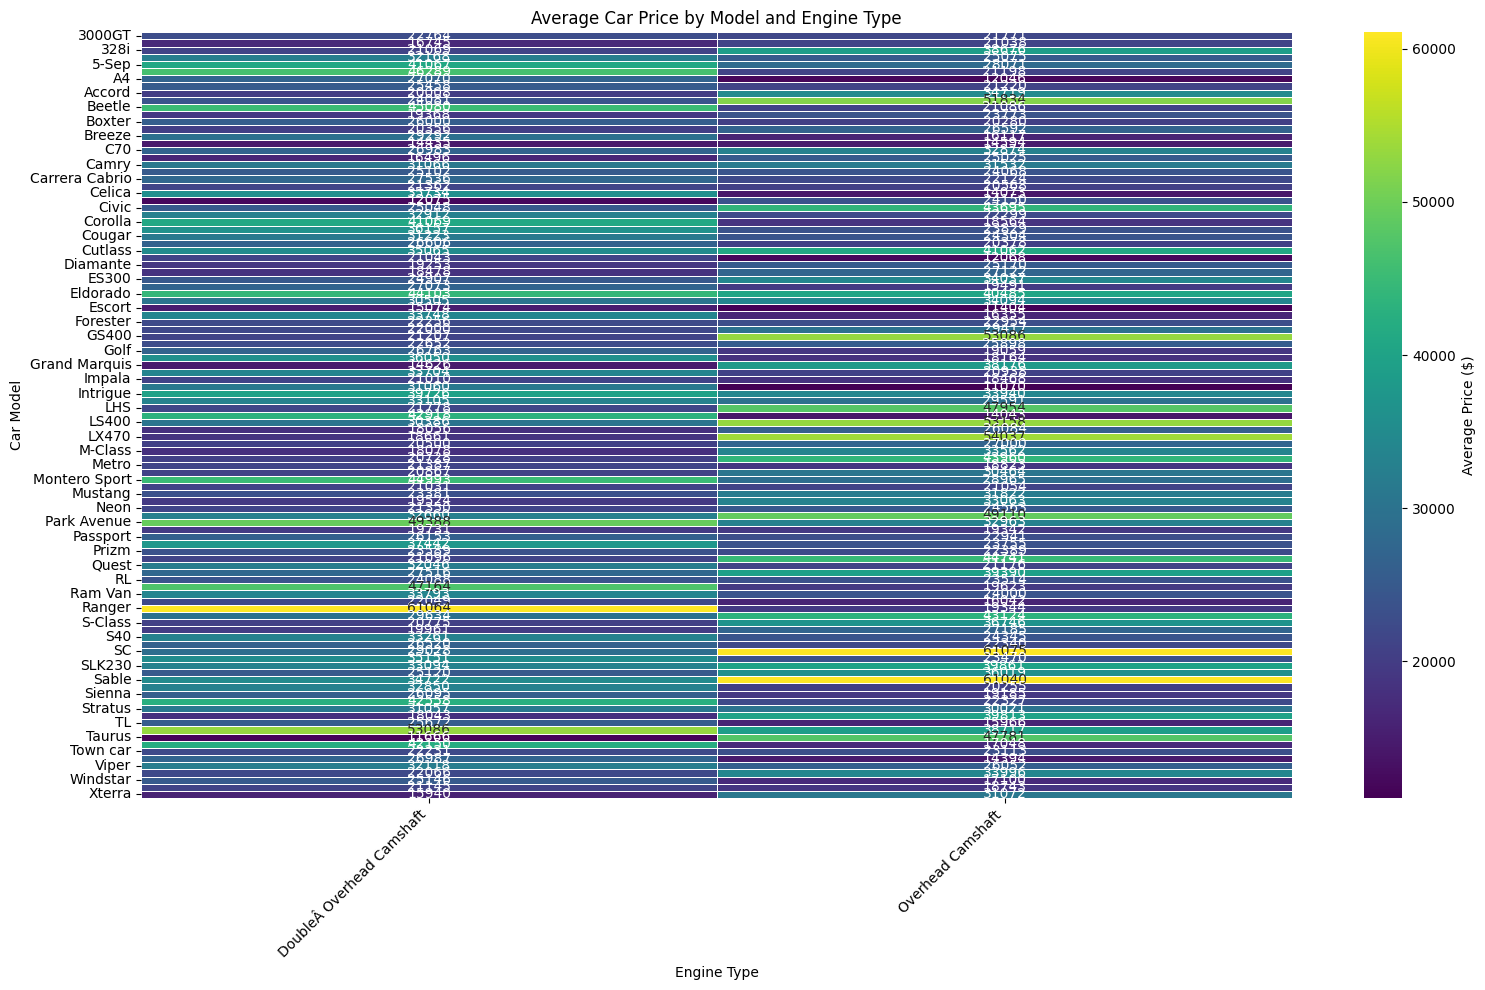


### Key Insights for Q15:

1.  **Model-Specific Pricing:** Each car model has its own distinct average price, which can vary significantly.
2.  **Engine Type Influence:** The average price for a given model can differ based on its engine type (Double Overhead Camshaft vs. Overhead Camshaft).
3.  **Presence of N/A Values:** Note the 'NaN' values in the table. These indicate that a particular car model is only available with one of the two engine types, or that specific combination was not present in the dataset. This might imply that certain models are exclusively manufactured with a specific engine configuration.
4.  **Identifying Premium Combinations:** By observing the heatmap, we can quickly identify which model-engine combinations command the highest average prices. For example, a model like 'Silhouette' with an 'Overhead Camshaft' engine might have a higher average price than the same model with a 'Double Overhead Camshaft' engine, or vice-versa, depending on the data.


In [58]:
#Q15 How does the average car price vary across different car models and engine types?

# Group by Model and Engine and calculate the average price
model_engine_avg_price = car_df.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()

print("\nAverage Car Price by Model and Engine Type:\n")
display(model_engine_avg_price)

# Visualize the average prices using a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(model_engine_avg_price.dropna(), annot=True, fmt=".0f", cmap="viridis", linewidths=.5, cbar_kws={'label': 'Average Price ($)'})
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Car Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- Key Insights ---
print("\n### Key Insights for Q15:\n")
print("1.  **Model-Specific Pricing:** Each car model has its own distinct average price, which can vary significantly.")
print("2.  **Engine Type Influence:** The average price for a given model can differ based on its engine type (Double Overhead Camshaft vs. Overhead Camshaft).")
print("3.  **Presence of N/A Values:** Note the 'NaN' values in the table. These indicate that a particular car model is only available with one of the two engine types, or that specific combination was not present in the dataset. This might imply that certain models are exclusively manufactured with a specific engine configuration.")
print("4.  **Identifying Premium Combinations:** By observing the heatmap, we can quickly identify which model-engine combinations command the highest average prices. For example, a model like 'Silhouette' with an 'Overhead Camshaft' engine might have a higher average price than the same model with a 'Double Overhead Camshaft' engine, or vice-versa, depending on the data.")